In [2]:
import pyreadr
result = pyreadr.read_r('/Users/liyiming/Desktop/BIS 568/HW/yaleemmlc-admissionprediction-5cf50bc/Results/5v_cleandf.RData')

In [3]:
df = result["df"]

In [4]:
df

,dep_name,esi,age,gender,ethnicity,race,lang,religion,maritalstatus,employstatus,...,cc_vaginaldischarge,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain
0,B,4,40,Male,Hispanic or Latino,White or Caucasian,English,None,Single,Full Time,...,0,0,0,0,0,0,0,0,0,0
1,B,4,66,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,...,0,0,0,0,0,0,0,0,0,0
2,B,2,66,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,...,0,0,0,0,0,0,0,0,0,0
3,A,2,66,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,...,0,0,0,0,0,0,0,0,0,0
4,A,3,84,Female,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560481,A,2,49,Male,Non-Hispanic,White or Caucasian,English,Episcopal,Single,Disabled,...,0,0,0,0,0,0,0,0,0,0
560482,A,3,50,Male,Non-Hispanic,White or Caucasian,English,Episcopal,Single,Disabled,...,0,0,0,0,0,0,0,0,0,0
560483,A,3,50,Male,Non-Hispanic,White or Caucasian,English,Episcopal,Single,Disabled,...,0,0,0,0,0,0,0,0,0,0
560484,A,3,50,Male,Non-Hispanic,White or Caucasian,English,Episcopal,Single,Disabled,...,0,0,0,0,0,0,0,0,0,0


In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
numeric_features = df.select_dtypes(include=[np.number])
print(numeric_features.columns)
categorical_features = df.select_dtypes(include=[np.object])
print(categorical_features.columns)
label_encode=categorical_features.apply(LabelEncoder().fit_transform)
data=pd.concat([label_encode,numeric_features],axis=1)
pct_null = data.isnull().sum() / len(data)
missing_features = pct_null[pct_null > 0.2].index
data.drop(missing_features, axis=1, inplace=True)
print(data.shape)

Index(['2ndarymalig', 'abdomhernia', 'abdomnlpain', 'abortcompl', 'acqfootdef',
       'acrenlfail', 'acutecvd', 'acutemi', 'acutphanm', 'adjustmentdisorders',
       ...
       'meds_musclerelaxants', 'meds_pre-natalvitamins',
       'meds_psychotherapeuticdrugs', 'meds_sedative/hypnotics',
       'meds_skinpreps', 'meds_smokingdeterrents', 'meds_thyroidpreps',
       'meds_unclassifieddrugproducts', 'meds_vitamins', 'n_surgeries'],
      dtype='object', length=755)
Index(['age', 'cc_abdominalcramping', 'cc_abdominaldistention',
       'cc_abdominalpain', 'cc_abdominalpainpregnant', 'cc_abnormallab',
       'cc_abscess', 'cc_addictionproblem', 'cc_agitation',
       'cc_alcoholintoxication',
       ...
       'cc_vaginaldischarge', 'cc_vaginalpain', 'cc_weakness', 'cc_wheezing',
       'cc_withdrawal-alcohol', 'cc_woundcheck', 'cc_woundinfection',
       'cc_woundre-evaluation', 'cc_wristinjury', 'cc_wristpain'],
      dtype='object', length=201)


/var/folders/72/6rwpgpjn3dn6_8jntnj58j_c0000gn/T/ipykernel_88550/3589960613.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = df.select_dtypes(include=[np.object])


(560486, 569)


<AxesSubplot:>

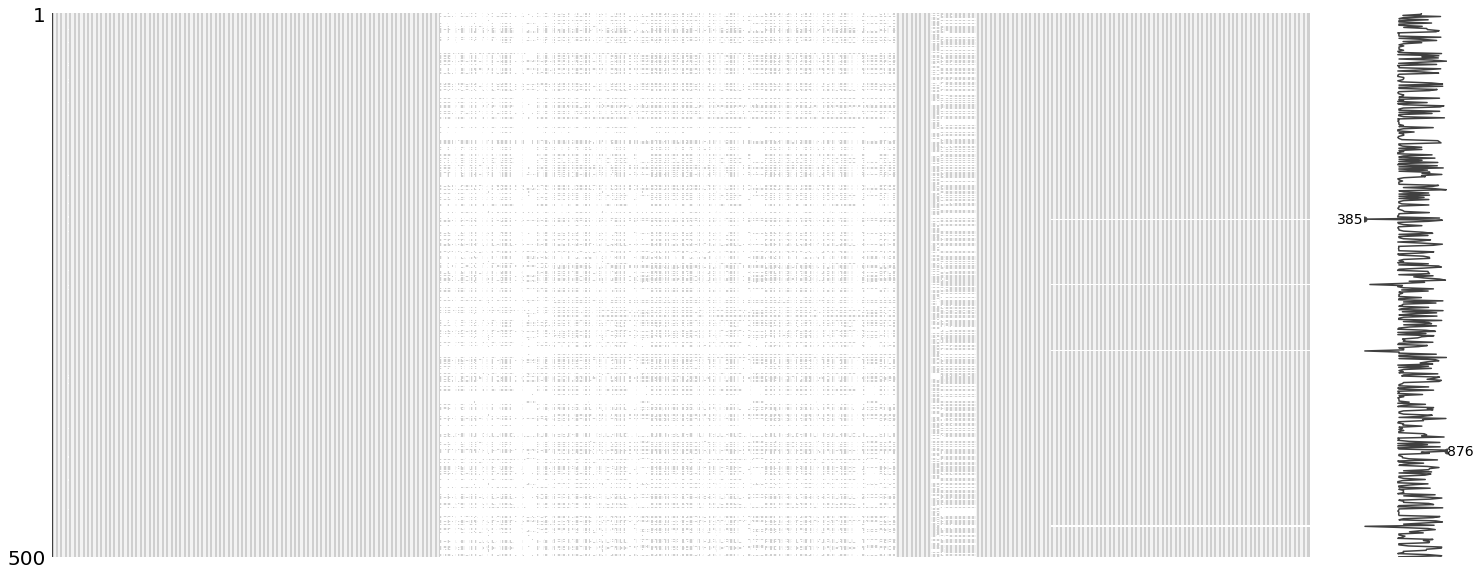

In [6]:
import missingno as msno
msno.matrix(df.sample(500))

In [7]:
#label encoding
data["disposition"] = df["disposition"]
label_encode = data.apply(LabelEncoder().fit_transform)
label_encode

,age,cc_abdominalcramping,cc_abdominaldistention,cc_abdominalpain,cc_abdominalpainpregnant,cc_abnormallab,cc_abscess,cc_addictionproblem,cc_agitation,cc_alcoholintoxication,...,meds_pre-natalvitamins,meds_psychotherapeuticdrugs,meds_sedative/hypnotics,meds_skinpreps,meds_smokingdeterrents,meds_thyroidpreps,meds_unclassifieddrugproducts,meds_vitamins,n_surgeries,disposition
0,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,48,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
2,48,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
3,48,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
4,66,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560481,31,0,0,0,0,0,0,0,0,0,...,0,1,0,5,0,0,0,0,8,0
560482,32,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,8,0
560483,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,1
560484,32,0,0,0,0,0,0,0,0,0,...,0,0,0,5,0,0,0,0,8,0


In [8]:
label_encode = label_encode.fillna(label_encode.median())
# Printing df1
label_encode

,age,cc_abdominalcramping,cc_abdominaldistention,cc_abdominalpain,cc_abdominalpainpregnant,cc_abnormallab,cc_abscess,cc_addictionproblem,cc_agitation,cc_alcoholintoxication,...,meds_pre-natalvitamins,meds_psychotherapeuticdrugs,meds_sedative/hypnotics,meds_skinpreps,meds_smokingdeterrents,meds_thyroidpreps,meds_unclassifieddrugproducts,meds_vitamins,n_surgeries,disposition
0,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,48,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
2,48,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
3,48,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
4,66,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560481,31,0,0,0,0,0,0,0,0,0,...,0,1,0,5,0,0,0,0,8,0
560482,32,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,8,0
560483,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,1
560484,32,0,0,0,0,0,0,0,0,0,...,0,0,0,5,0,0,0,0,8,0


In [9]:
X = label_encode.drop(columns = ["disposition"])
y = label_encode["disposition"]

In [10]:
X

,age,cc_abdominalcramping,cc_abdominaldistention,cc_abdominalpain,cc_abdominalpainpregnant,cc_abnormallab,cc_abscess,cc_addictionproblem,cc_agitation,cc_alcoholintoxication,...,meds_musclerelaxants,meds_pre-natalvitamins,meds_psychotherapeuticdrugs,meds_sedative/hypnotics,meds_skinpreps,meds_smokingdeterrents,meds_thyroidpreps,meds_unclassifieddrugproducts,meds_vitamins,n_surgeries
0,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,48,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,48,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,48,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,66,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560481,31,0,0,0,0,0,0,0,0,0,...,0,0,1,0,5,0,0,0,0,8
560482,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,8
560483,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
560484,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,0,0,8


In [11]:
y

0         1
1         1
2         1
3         1
4         0
         ..
560481    0
560482    0
560483    1
560484    0
560485    0
Name: disposition, Length: 560486, dtype: int64

In [12]:
y

0         1
1         1
2         1
3         1
4         0
         ..
560481    0
560482    0
560483    1
560484    0
560485    0
Name: disposition, Length: 560486, dtype: int64

In [13]:
from sklearn.feature_selection import SelectKBest, chi2
sel_chi2 = SelectKBest(chi2, k=60)    
sel_chi2.fit_transform(X, y)
chi = sel_chi2.get_support()

chi_col = X.columns[chi]
df2 = X[chi_col]
df2.shape

(560486, 60)

In [14]:
cor_df=df2.corr()
#delete columns which have high correlations

In [15]:
threshold = 0.5
upper = cor_df.where(np.triu(np.ones(cor_df.shape), k=1).astype(np.bool))
drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]

/var/folders/72/6rwpgpjn3dn6_8jntnj58j_c0000gn/T/ipykernel_88550/3402406569.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = cor_df.where(np.triu(np.ones(cor_df.shape), k=1).astype(np.bool))


In [16]:
len(drop)

17

In [17]:
df3 = df2.drop(columns = drop)

In [18]:
df3

,age,cc_shortnessofbreath,acutecvd,chfnonhp,chrkidneydisease,copd,coronathero,diabmelnoc,dysrhythmia,hyperlipidem,...,meds_elect/caloric/h2o,meds_hormones,meds_musclerelaxants,meds_psychotherapeuticdrugs,meds_sedative/hypnotics,meds_skinpreps,meds_thyroidpreps,meds_unclassifieddrugproducts,meds_vitamins,n_surgeries
0,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,48,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,48,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,48,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,66,0,0,0,0,0,0,0,0,1,...,2,0,0,0,1,0,0,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560481,31,0,0,1,0,0,0,1,1,0,...,0,1,0,1,0,5,0,0,0,8
560482,32,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,3,0,0,0,8
560483,32,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,8
560484,32,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,5,0,0,0,8


In [19]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(df3, y)
SFM = SelectFromModel(lsvc, prefit=True)
SFM.transform(df3)
L1 = SFM.get_support()

L1_col = df3.columns[L1]
df4 = df3[L1_col]

df4.shape

/Users/liyiming/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(560486, 35)

In [20]:
x = df4

In [21]:
df5 = df4
df5["disposition"] = y

/var/folders/72/6rwpgpjn3dn6_8jntnj58j_c0000gn/T/ipykernel_88550/2834429735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["disposition"] = y


* split data into train, validation, and test sets

In [22]:
train, validation, test = np.split(df5.sample(frac=1), [int(.6*len(df5)),
int(.8*len(df5))])
X_train = train.drop(columns = ["disposition"])
y_train = train["disposition"]
X_validation = validation.drop(columns = ["disposition"])
y_validation = validation["disposition"]
X_test = test.drop(columns = ["disposition"])
y_test = test["disposition"]

In [23]:
len(train) + len(validation) + len(test)

560486

* Logistic regression

In [24]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=100,penalty = "l2", C= 0.01)
lg.fit(X_train, y_train)
y_pred_val = lg.predict(X_validation)
y_pred_test = lg.predict(X_test)

/Users/liyiming/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


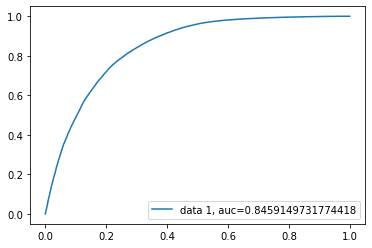

In [25]:
# AUC
from sklearn import metrics
import matplotlib.pyplot as plt
y_pred_proba = lg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

[0.06544343 0.14701182 0.21285653 0.2943761  0.39493949 0.50152332
 0.60484863 0.73100566 0.87110411 0.93702521]
[0.03032191 0.14656807 0.24850811 0.35098928 0.45210407 0.55473322
 0.65522085 0.75686379 0.85612811 0.91570667]


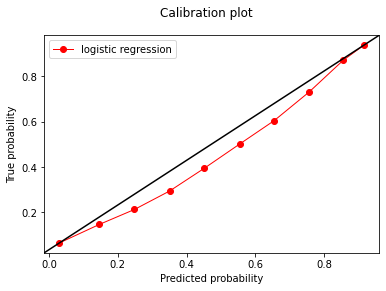

In [26]:
# Calibration curve
import matplotlib.lines as mlines
from sklearn.calibration import calibration_curve
probs = lg.predict_proba(X_test)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, probs, n_bins=10)
print(prob_true)
print(prob_pred)
fig, ax = plt.subplots()
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='logistic regression', color = "red")
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability')
plt.legend()
plt.show()

/Users/liyiming/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Precision-Recall curve')

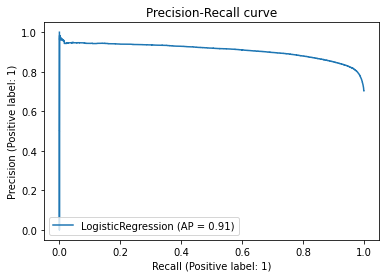

In [29]:
# PR-AUC
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
average_precision = average_precision_score(y_test, y_pred_test)
disp = plot_precision_recall_curve(lg, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve')

* Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=150, random_state =100, max_depth = 50)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

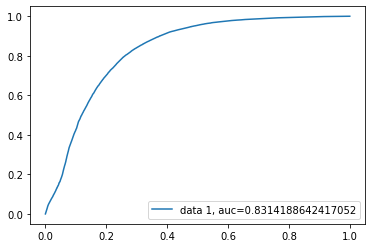

In [31]:
# AUC
from sklearn import metrics
import matplotlib.pyplot as plt
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

[0.07352768 0.18152425 0.32714412 0.45281583 0.50516681 0.61121583
 0.66589506 0.74636015 0.83635081 0.90638234]
[0.05616317 0.14835937 0.25023689 0.34981263 0.4521459  0.54997565
 0.65453384 0.75713255 0.85979884 0.94539052]


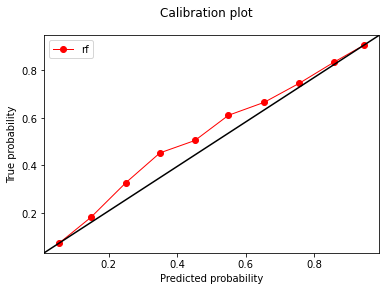

In [32]:
# Calibration curve
import matplotlib.lines as mlines
from sklearn.calibration import calibration_curve
probs = rf.predict_proba(X_test)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, probs, n_bins=10)
print(prob_true)
print(prob_pred)
fig, ax = plt.subplots()
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='rf', color = "red")
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability')
plt.legend()
plt.show()

/Users/liyiming/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Precision-Recall curve')

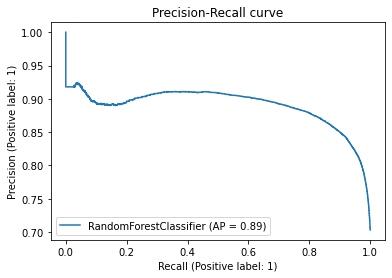

In [33]:
# PR-AUC
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
average_precision = average_precision_score(y_test, y_pred)
disp = plot_precision_recall_curve(rf, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve')

* xgboost

In [34]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
xgb = xgb.XGBClassifier()
xgb.fit(X_train,y_train)
y_preds = xgb.predict(X_test)
accuracy_score(y_test,y_preds)

0.8332173633784724

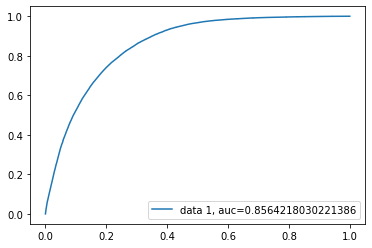

In [35]:
# AUC
from sklearn import metrics
import matplotlib.pyplot as plt
y_pred_proba = xgb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

[0.05302419 0.1517316  0.24691806 0.34947695 0.44483609 0.5328216
 0.63941176 0.75021946 0.85772468 0.93353234]
[0.04452681 0.14482748 0.24816696 0.34956862 0.45059537 0.5556586
 0.65509226 0.75563578 0.85590943 0.93051443]


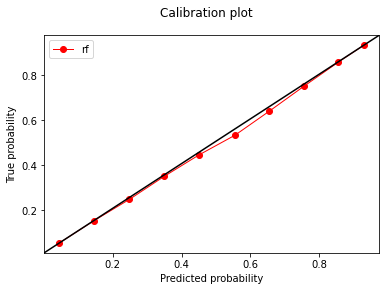

In [36]:
# Calibration curve
import matplotlib.lines as mlines
from sklearn.calibration import calibration_curve
probs = xgb.predict_proba(X_test)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, probs, n_bins=10)
print(prob_true)
print(prob_pred)
fig, ax = plt.subplots()
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='rf', color = "red")
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability')
plt.legend()
plt.show()

/Users/liyiming/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Precision-Recall curve')

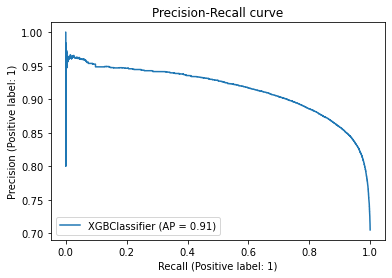

In [37]:
# PR-AUC
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
average_precision = average_precision_score(y_test, y_pred)
disp = plot_precision_recall_curve(xgb, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve')

* OR of LG

In [39]:
import statsmodels.api as sm
res = sm.Logit(y_train, X_train).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.537467
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            disposition   No. Observations:               336291
Model:                          Logit   Df Residuals:                   336256
Method:                           MLE   Df Model:                           34
Date:                Mon, 28 Nov 2022   Pseudo R-squ.:                  0.1169
Time:                        22:46:03   Log-Likelihood:            -1.8075e+05
converged:                       True   LL-Null:                   -2.0466e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
age                               0.0313      0.000    158.993      0.000       0.031       0.032
cc_shortnessofbreath             -0.1626      0.014    -11.257      0.000      -0.191      -0.134
acutecvd                         -0.3826      0.021    -18.094      0.000      -0.424      -0.341
chfnonhp                         -0.4870      0.024    -20.505      0.000      -0.534      -0.440
chrkidneydisease                 -0.5818      0.021    -27.087      0.000      -0.624      -0.540
coronathero                      -0.5076      0.018    -28.227      0.000      -0.543      -0.472
dysrhythmia                      -0.3770      0.017    -22.365      0.000      -0.410      -0.344
hyperlipidem                     -0.1916      0.012    -15.906      0.000      -0.215      -0.168
n_admissions                     -0.0661      0.002    -29.304      0.000      -0.071      -0.062
bloodua_npos                     -0.0971      0.007    -14.002      0.000      -0.111      -0.084
pregtestur_count                  0.3537      0.005     71.839      0.000       0.344       0.363
bloodculture,routine_count       -0.2465      0.013    -18.304      0.000      -0.273      -0.220
meds_analgesics                  -0.7824      0.015    -50.685      0.000      -0.813      -0.752
meds_antiarthritics              -0.3093      0.021    -14.585      0.000      -0.351      -0.268
meds_antiasthmatics              -0.2759      0.011    -24.269      0.000      -0.298      -0.254
meds_antibiotics                 -0.4061      0.025    -16.052      0.000      -0.456      -0.357
meds_anticoagulants              -1.0620      0.037    -28.502      0.000      -1.135      -0.989
meds_antihistamines               0.0827      0.030      2.800      0.005       0.025       0.141
meds_antihyperglycemics          -0.4206      0.015    -28.321      0.000      -0.450      -0.392
meds_antiparkinsondrugs          -0.6406      0.053    -12.202      0.000      -0.744      -0.538
meds_antiplateletdrugs           -0.9342      0.021    -43.456      0.000      -0.976      -0.892
meds_antivirals                  -0.2963      0.035     -8.441      0.000      -0.365      -0.227
meds_autonomicdrugs              -0.3922      0.043     -9.034      0.000      -0.477      -0.307
meds_cardiacdrugs                -0.6680      0.023    -29.317      0.000      -0.713      -0.623
meds_cnsdrugs                    -0.2247      0.017    -12.879      0.000      -0.259      -0.191
meds_diuretics                   -0.6616      0.023    -29.355      0.000      -0.706      -0.617
meds_eentpreps                   -0.4010      0.023    -17.427      0.000      -0.446      -0.356
meds_elect/caloric/h2o           -0.5008      0.022    -22.873      0.000      -0.544      -0.458
meds_hormones                    -0.3864      0.029    -13.310      0.000      -0.443      -0.330
meds_psychotherapeuticdrugs      -0.2822      0.010    -28.186      0.000      -0.302      -0.263
meds_se

In [41]:
OR=np.exp(res.params)

In [42]:
OR

age                              1.031841
cc_shortnessofbreath             0.849945
acutecvd                         0.682089
chfnonhp                         0.614468
chrkidneydisease                 0.558880
coronathero                      0.601920
dysrhythmia                      0.685937
hyperlipidem                     0.825607
n_admissions                     0.935991
bloodua_npos                     0.907456
pregtestur_count                 1.424335
bloodculture,routine_count       0.781506
meds_analgesics                  0.457296
meds_antiarthritics              0.733960
meds_antiasthmatics              0.758914
meds_antibiotics                 0.666213
meds_anticoagulants              0.345768
meds_antihistamines              1.086168
meds_antihyperglycemics          0.656629
meds_antiparkinsondrugs          0.526958
meds_antiplateletdrugs           0.392918
meds_antivirals                  0.743591
meds_autonomicdrugs              0.675564
meds_cardiacdrugs                0

* SHAP summary plot with top 20 variables

In [45]:
from scipy.special import softmax

def print_feature_importances_shap_values(shap_values, features):
    '''
    Prints the feature importances based on SHAP values in an ordered way
    shap_values -> The SHAP values calculated from a shap.Explainer object
    features -> The name of the features, on the order presented to the explainer
    '''
    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
    # Calculates the normalized version
    importances_norm = softmax(importances)
    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}
    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")

In [80]:
# SHAP summary plot
import shap
# Fits the explainer
explainer = shap.Explainer(lg.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Permutation explainer: 112099it [13:48, 133.75it/s]                             


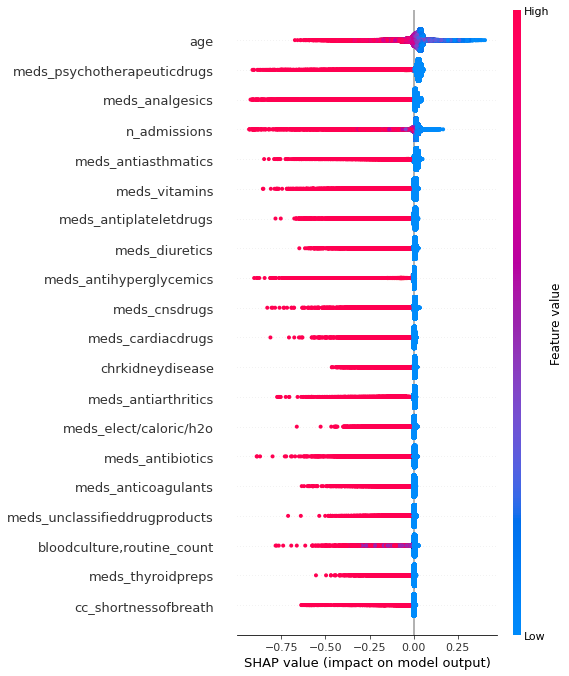

In [47]:
shap.summary_plot(shap_values)

In [48]:
# feature importance 
print_feature_importances_shap_values(shap_values, X_train.columns)

age -> 0.0538 (softmax = 0.0298)
meds_psychotherapeuticdrugs -> 0.0400 (softmax = 0.0294)
meds_analgesics -> 0.0354 (softmax = 0.0293)
n_admissions -> 0.0242 (softmax = 0.0290)
meds_antiasthmatics -> 0.0241 (softmax = 0.0290)
meds_vitamins -> 0.0186 (softmax = 0.0288)
meds_antiplateletdrugs -> 0.0176 (softmax = 0.0288)
meds_diuretics -> 0.0150 (softmax = 0.0287)
meds_antihyperglycemics -> 0.0127 (softmax = 0.0286)
meds_cnsdrugs -> 0.0125 (softmax = 0.0286)
meds_cardiacdrugs -> 0.0108 (softmax = 0.0286)
chrkidneydisease -> 0.0102 (softmax = 0.0286)
meds_antiarthritics -> 0.0098 (softmax = 0.0285)
meds_elect/caloric/h2o -> 0.0088 (softmax = 0.0285)
meds_antibiotics -> 0.0088 (softmax = 0.0285)
meds_anticoagulants -> 0.0076 (softmax = 0.0285)
meds_unclassifieddrugproducts -> 0.0070 (softmax = 0.0285)
bloodculture,routine_count -> 0.0064 (softmax = 0.0284)
meds_thyroidpreps -> 0.0057 (softmax = 0.0284)
cc_shortnessofbreath -> 0.0054 (softmax = 0.0284)
acutecvd -> 0.0049 (softmax = 0.0284)


* SHAP force plot

In [82]:
shap.initjs()
shap.force_plot(shap_values[0])

In [83]:
shap.initjs()
shap.force_plot(shap_values[1])

In [84]:
shap.initjs()
shap.force_plot(shap_values[3])

In [86]:
shap.initjs()
shap.force_plot(shap_values[5])

In [85]:
shap.initjs()
shap.force_plot(shap_values[7])

* SHAP dependence plot

In [97]:
shap.dependence_plot("age", shap_values, X_test)